Préparer les fichiers txt, et faire des analyses préliminaires 

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = "../../data/halley/halley_txt/" # Path to the directory containing text files
files = sorted(os.listdir(path)) # trier les fichiers par ordre alphabétique
len(files)  # probably get rid of this later

551

In [100]:
#parcourir les fichiers pour extraire leurs dates ?? décénnie ? 
#dates, le jour même est important pour qquns, au moins la semaine mais bon 


chaine = 'KB_JB838_1887-12-22_01-00001'
type(chaine) # to check that it's a string, so we can def delete this later 

# la méthode split afin d'avoir la date/décénnie des documents 
chaine_split = chaine.split('_')
# chaine_split ,also don't think this is necessary to have twice
date = chaine_split[2] #cchercher le 3e élément
date_split = date.split('-')
year = date_split[0]
month = date_split[1]
day = date_split[2]
#I'm not actually sure that I'll need this for any sort of analysis yet, so I'm just going to leave it here for now knowing that it works

count_decade = defaultdict(int)
count_month = defaultdict(int)
count_day = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        day = int(elems[2].split("-")[2]) # extracting day
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_day[day] += 1
    else:
        print(f"Anomalous file: {f}")

In [5]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")
#faut modifier ceci pour tous les journaux qui traitent Halley 
#en vrai il ne faut pas faire tout ça hardcodé vue que c'est déjà dans le read me, mais pe interéssant pour une ananlyse éventuelle par journal etc 

Il y a 167 exemplaires du journal Le Soir et 24 exemplaires de La Libre Belgique


In [6]:
print(f"Il y a {count_decade['1830s']} fichiers pour la décennie 1930s")

Il y a 11 fichiers pour la décennie 1930s


Visualiser le nombre de documents par journal

In [ ]:
#automatically get newspaper names from readme file
newspaper_names = {}
with open('../../data/halley/_README.txt', 'r', encoding='utf-8') as f:
    for line_num, line in enumerate(f, start=1):
        if 21 <= line_num <= 34:
            if line.strip():
                # Split by tab first, if that doesn't work, split by multiple spaces
                if '\t' in line:
                    parts = line.strip().split('\t')
                else:
                    parts = line.strip().split(None, 1)  # Split on whitespace, max 1 split
                
                if len(parts) == 2:
                    code, name = parts
                    newspaper_names[code] = name
len(newspaper_names)  # to check that we have all newspaper names
#struggled a bit bc of inconsistent spacing in the readme file but we're good now

14

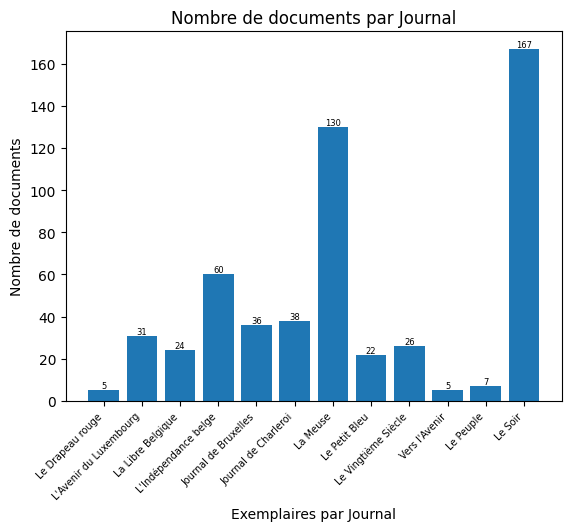

In [91]:
display_names = [newspaper_names.get(code, code) for code in count_newspapers.keys()]

index = np.arange(len(count_newspapers))
paper_bars = plt.bar(index, count_newspapers.values())
plt.xlabel('Exemplaires par Journal')
plt.ylabel('Nombre de documents')
plt.xticks(index, display_names, fontsize=7, rotation=45, ha='right')  # ha='right' aligns better with rotation
plt.title('Nombre de documents par Journal')
plt.bar_label(paper_bars, label_type='edge', fontsize=6)
#plt.tight_layout()   Prevents labels from being cut off

plt.show()

Visualiser le nombre de journaux par décennie

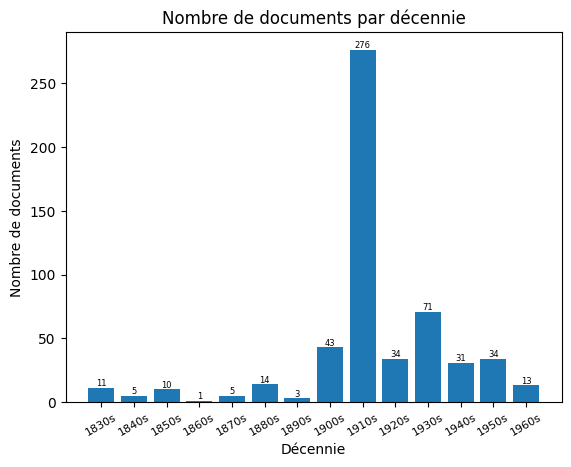

In [88]:
sorted_decades = dict(sorted(count_decade.items(), key=lambda item: item[0]))

index = np.arange(len(sorted_decades))
decade_bars = plt.bar(index, sorted_decades.values())
plt.xlabel('Décennie')
plt.ylabel('Nombre de documents')
plt.xticks(index, sorted_decades.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par décennie')
plt.bar_label(decade_bars, label_type='edge', fontsize=6)

plt.show()

Visualiser le nombre de journaux par mois en 1910

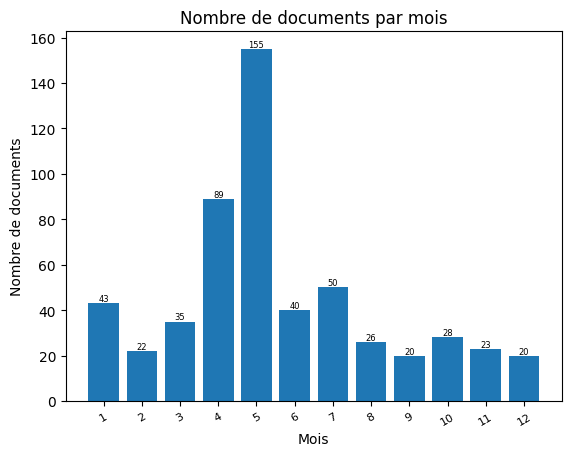

In [49]:
passage_1910 = [str(year) for year in range(1909, 1911)]
sorted_months = dict(sorted(count_month.items(), key=lambda item: int(item[0])))
  
index = np.arange(len(sorted_months))
month_bars = plt.bar(index, sorted_months.values())
plt.xlabel('Mois')
plt.ylabel('Nombre de documents')
plt.xticks(index, sorted_months.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.bar_label(month_bars, label_type='edge', fontsize=6)

plt.show()


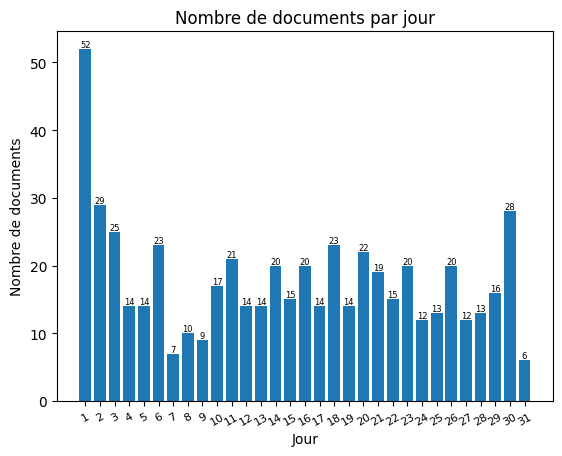

In [ ]:
sorted_days = dict(sorted(count_day.items(), key=lambda item: int(item[0])))

index = np.arange(len(sorted_days))
bars = plt.bar(index, sorted_days.values())
plt.xlabel('Jour')
plt.ylabel('Nombre de documents')
plt.xticks(index, sorted_days.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par jour du mois') 
plt.bar_label(bars, label_type='edge', fontsize=6)
plt.show()


#idk general obeservation about publishing patterns over the month, could be compared to may 1910 to follow up
#maybe talk about how press was produced back then, idk what that really looked like. Might need to account for that different journals are monthly, weekly, daily etc 



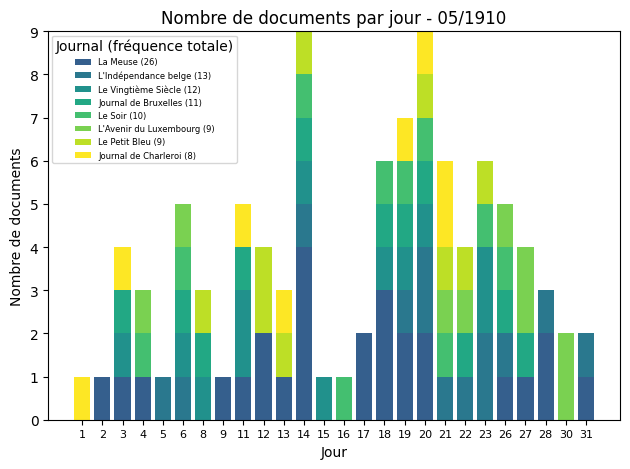

In [ ]:
#this need to be cleaned up to tell the story we want to tell, but it's a good start to play around with 
#I need to decide even if it's relevant to focus on which journals published that month... 
specific_year = '1910'
specific_month = '05'

# Count by day AND newspaper
day_newspaper_count = defaultdict(lambda: defaultdict(int))

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        year = elems[2].split("-")[0]
        month = elems[2].split("-")[1]
        day = int(elems[2].split("-")[2])
        newspaper = elems[1]
        
        if year == specific_year and month == specific_month:
            day_newspaper_count[day][newspaper] += 1

# Calculate total frequency for each newspaper across all days
newspaper_total_frequency = defaultdict(int)
for day_data in day_newspaper_count.values():
    for newspaper, count in day_data.items():
        newspaper_total_frequency[newspaper] += count

# Sort newspapers by total frequency and assign colors
sorted_newspapers = sorted(newspaper_total_frequency.items(), key=lambda x: x[1], reverse=True)
newspapers = [newspaper for newspaper, _ in sorted_newspapers]

# Use a colormap - more frequent = darker/more intense color
cmap = plt.cm.viridis  # or try: plt.cm.plasma, plt.cm.inferno, plt.cm.Blues
colors = cmap(np.linspace(0.3, 1.0, len(newspapers)))
newspaper_colors = {newspaper: colors[i] for i, newspaper in enumerate(newspapers)}

# Prepare data for stacked bar chart
days = sorted(day_newspaper_count.keys())
index = np.arange(len(days))
bottom = np.zeros(len(days))

# Create stacked bars
for newspaper in newspapers:
    counts = [day_newspaper_count[day][newspaper] for day in days]
    plt.bar(index, counts, bottom=bottom, color=newspaper_colors[newspaper], 
            label=f"{newspaper_names.get(newspaper, newspaper)} ({newspaper_total_frequency[newspaper]})")
    bottom += counts

plt.xlabel('Jour')
plt.ylabel('Nombre de documents')
plt.xticks(index, days, fontsize=8)
plt.title(f'Nombre de documents par jour - {specific_month}/{specific_year}')
plt.legend(fontsize=6, title="Journal (fréquence totale)")
plt.tight_layout()
plt.show()